In [13]:
import pandas as pd
import numpy as np

data = pd.read_csv('troop_movements.csv', header=None, names=["timestamp", "unit_type", "faction", "location_x", "location_y", "destination_x", "destination_y","HomeWorld"])

In [5]:
faction_count = data["faction"].value_counts()
print(faction_count)

faction
resistance              501
empire                  499
empire_or_resistance      1
Name: count, dtype: int64


In [6]:
homeworld_count = data["HomeWorld"].value_counts()
print(homeworld_count)

HomeWorld
Champala        31
Kalee           31
Vulpter         30
Mirial          30
Trandosha       28
Aleen Minor     28
Tholoth         28
Naboo           27
Eriadu          27
Stewjon         27
Kashyyyk        26
Rodia           26
Muunilinst      26
Dathomir        26
Iridonia        26
Bestine IV      26
Socorro         25
Toydaria        25
Haruun Kal      25
Dagobah         25
Concord Dawn    25
Shili           24
Zolan           24
Tund            24
Quermia         24
Mon Cala        23
Chandrila       22
Sullust         22
Cerea           21
Alderaan        21
Serenno         21
Malastare       20
Skako           20
Tatooine        20
Iktotch         20
Ojom            20
Corellia        19
Troiken         19
Glee Anselm     19
Ryloth          17
Dorin           17
Umbara          15
homeworld        1
Name: count, dtype: int64


In [7]:
unit_type = data["unit_type"].value_counts()
print(unit_type)

unit_type
resistance_soldier    144
unknown               127
tie_silencer          127
x-wing                127
at-at                 122
stormtrooper          120
at-st                 118
tie_fighter           115
unit_type               1
Name: count, dtype: int64


In [8]:
data["is_resistance"]= data["faction"] == "resistance"
print(data.head())

                    timestamp     unit_type               faction  location_x  \
timestamp             unit_id     unit_type  empire_or_resistance  location_x   
2025-03-17 15:14:23         1       unknown            resistance           1   
2025-03-17 15:14:22         2  tie_silencer                empire           1   
2025-03-17 15:14:21         3  tie_silencer                empire           7   
2025-03-17 15:14:20         4        x-wing                empire           4   

                     location_y  destination_x  destination_y   HomeWorld  \
timestamp            location_y  destination_x  destination_y   homeworld   
2025-03-17 15:14:23           5              6              5    Iridonia   
2025-03-17 15:14:22           2             10              8  Muunilinst   
2025-03-17 15:14:21           4              6              3       Kalee   
2025-03-17 15:14:20           1              4              7       Dorin   

                     is_resistance  
timestamp    

C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_7356\731319876.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="faction", data=data, palette="coolwarm")


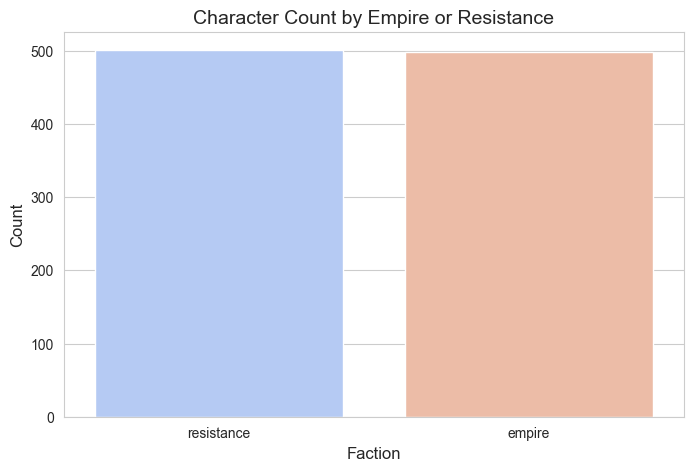

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(8,5))
sns.countplot(x="faction", data=data, palette="coolwarm")

plt.xlabel("Faction", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Character Count by Empire or Resistance", fontsize=14)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

features = ["HomeWorld","unit_type"]
target = "is_resistance"

x = data[features]
y = data[target]

x_encoded = pd.get_dummies(x)

X_train, X_test, y_train, y_test = train_test_split(x_encoded, target, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_

feature_importances = pd.DataFrame({'Feature':x_encoded.columns, 'Importance':importances})

feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(8,6))
plt.bar(feature_importances['Feature'], feature_importances['Imprtance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importnace')
plt.show()

most_influential_unit_type = feature_importances.iloc[0]['Feature']
print('Most Influential Unit Type:', most_influential_unit_type)




KeyError: 'is_resistance'